x_train: (50000, 32, 32, 3)
x_train: (50000, 3072)
w1: (3072, 10)
b1: (10,)
iteration 0 : loss 1.000044 : accuracy 0.613771 
iteration 10 : loss 0.887937 : accuracy 0.726058 
iteration 20 : loss 0.854832 : accuracy 0.733987 
iteration 30 : loss 0.834869 : accuracy 0.737822 
iteration 40 : loss 0.821948 : accuracy 0.740773 
iteration 50 : loss 0.813309 : accuracy 0.742733 
iteration 60 : loss 0.807375 : accuracy 0.743987 
iteration 70 : loss 0.803184 : accuracy 0.745573 
iteration 80 : loss 0.800137 : accuracy 0.746276 
iteration 90 : loss 0.797851 : accuracy 0.747498 
iteration 100 : loss 0.796082 : accuracy 0.748271 
iteration 110 : loss 0.794671 : accuracy 0.748960 
iteration 120 : loss 0.793513 : accuracy 0.749604 
iteration 130 : loss 0.792538 : accuracy 0.750049 
iteration 140 : loss 0.791698 : accuracy 0.750240 
iteration 150 : loss 0.790961 : accuracy 0.750884 
iteration 160 : loss 0.790305 : accuracy 0.751407 
iteration 170 : loss 0.789713 : accuracy 0.751831 
iteration 180 : l

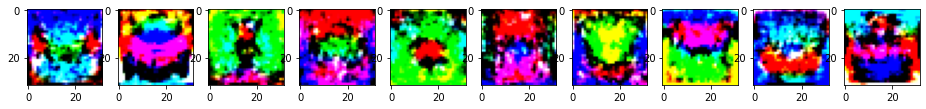

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
print('x_train:', x_train.shape)
K = len(np.unique(y_train)) # Classes
Ntr = x_train.shape[0]
Nte = x_test.shape[0]
Din = 3072 # CIFAR10
# Din = 784 # MINIST
# Normalize pixel values
x_train, x_test = x_train / 255.0, x_test / 255.0
mean_image = np.mean(x_train, axis=0)
x_train = x_train - mean_image
x_test = x_test - mean_image
y_train = tf.keras.utils.to_categorical(y_train, num_classes=K)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=K)
x_train = np.reshape(x_train,(Ntr,Din))
x_test = np.reshape(x_test,(Nte,Din))
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
print('x_train:', x_train.shape)
std=1e-5
w1 = std*np.random.randn(Din, K)
b1 = np.zeros(K)
print("w1:", w1.shape)
print("b1:", b1.shape)
batch_size = Ntr
iterations =300
lr =1.1e-2
lr_decay=0.999
reg =5e-6
loss_history = []
train_acc_history = []
val_acc_history = []
seed = 0
rng = np.random.default_rng(seed=seed)
for t in range(iterations):
    indices = np.arange(Ntr)
    rng.shuffle(indices)


    # Forward pass
    x=x_train[indices]
    y=y_train[indices]
    y_pre=np.matmul(x_train,w1) + b1
    loss=(1/batch_size)*np.square(y_pre-y_train).sum()  + reg*(np.sum(w1*w1))
    loss_history.append(loss)
    

    # Backward pass
    dy_pre =(1/batch_size)*2.0*(y_pre-y_train)
    dw1= np.matmul(x_train.T,dy_pre)
    db1=dy_pre.sum(axis=0)
    w1-=lr*dw1
    b1-=lr*db1
    lr*=lr_decay
    train_acc= 1.0 - (1/(Ntr*9))*(np.abs(np.argmax(y_train,axis=1) - np.argmax(y_pre,axis=1))).sum()
    train_acc_history.append(train_acc)
    if t % 10==0:
        print('iteration %d : loss %f : accuracy %f '% (t,loss,train_acc))



# Printing accuracies and displaying w as images
y_test_pre=np.matmul(x_test,w1) + b1
test_acc= 1.0 - (1/(Nte*9))*(np.abs(np.argmax(y_test,axis=1) - np.argmax(y_test_pre,axis=1))).sum()

print(train_acc_history[-1])
print(test_acc)

frame,ax= plt.subplots(1,K)
frame.set_size_inches(16,10)

for i in range(K):
    img= w1[:,i].reshape(32,32,3)
    ax[i].imshow(img*1000)
plt.show()
